In [1]:
import sys
import os
from pathlib import Path

sys.path.append(sys.path[0] + '/src')

import torch
import pandas as pd
from extracting_embedding import extract_embedding
from visualization import tsne,visualize
import utils

# import visualization
# import importlib 
# importlib.reload(visualization)

device = utils.getting_device()
#load data from file
all_df=pd.read_csv("data/RosettaCodeData.csv")


languages = ['C-sharp', 'PowerShell', 'Julia', 'Groovy', 'Java', 'Tcl', 'Go', 'Swift', 'ALGOL-68', 'Common-Lisp']

filtered_df = all_df.dropna()
rows_to_drop = filtered_df["task"].str.contains('Empty-program')
df = filtered_df[~rows_to_drop]

part_df = df[df['language'].isin(languages)].reset_index(drop=True)

device: cuda


## BERT

In [7]:
bert_path = extract_embedding(part_df, device, model='bert', max_len = 100)
bert_path

out/bert_12060.pt
Model vertified: BERT


Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Starting extract embeddings......
Time elapsed: 2579.33 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([12060, 768])


'out/bert_12060.pt'

In [8]:
bert_emb = torch.load(bert_path, map_location="cpu")

In [9]:
tsne_df = tsne(bert_emb, part_df)

torch.Size([12060, 768]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.003s...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
[t-SNE] Computed neighbors for 12060 samples in 1.771s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilitie

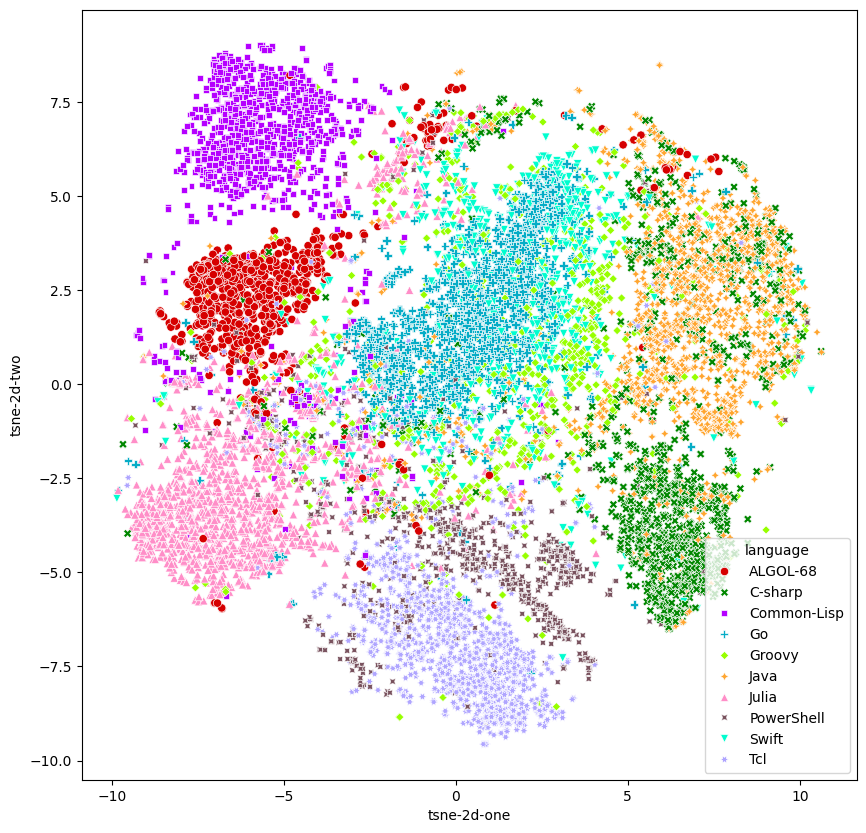

In [12]:
visualize(tsne_df, part_df, model = 'bert', data_type = 'language')

## GPT

In [13]:
gpt_path = extract_embedding(part_df, device, model='gpt', max_len = 100)
## gpt_path = 'out/bert_14802.pt'

out/gpt_12060.pt
Model vertified: GPT
Starting extract embeddings......
Time elapsed: 3890.68 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([12060, 768])


In [12]:
gpt_emb = torch.load('out/gpt_12060.pt', map_location="cpu")
tsne_df = tsne(gpt_emb, part_df)

torch.Size([12060, 768]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.003s...
[t-SNE] Computed neighbors for 12060 samples in 1.526s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilities for sample 3000 / 12060
[t-SNE] Computed conditional probabilities for sample 4000 / 12060
[t-SNE] Computed conditional probabilities for sample 5000 / 12060
[t-SNE] Computed conditional probabilities for sample 6000 / 12060
[t-SNE] Computed conditional probabilities for sample 7000 / 12060
[t-SNE] Computed conditional probabilities for sample 8000 / 12060
[t-SNE] Computed conditional probabilities for sample 9000 / 12060
[t-SNE] Computed conditional probabilities for sample 10000 / 12060
[t-SNE] Computed conditional probabilities for sample 11000 / 12060
[t-SNE] Computed conditional probabilities for sample 12000 / 12060
[t-SNE] Computed

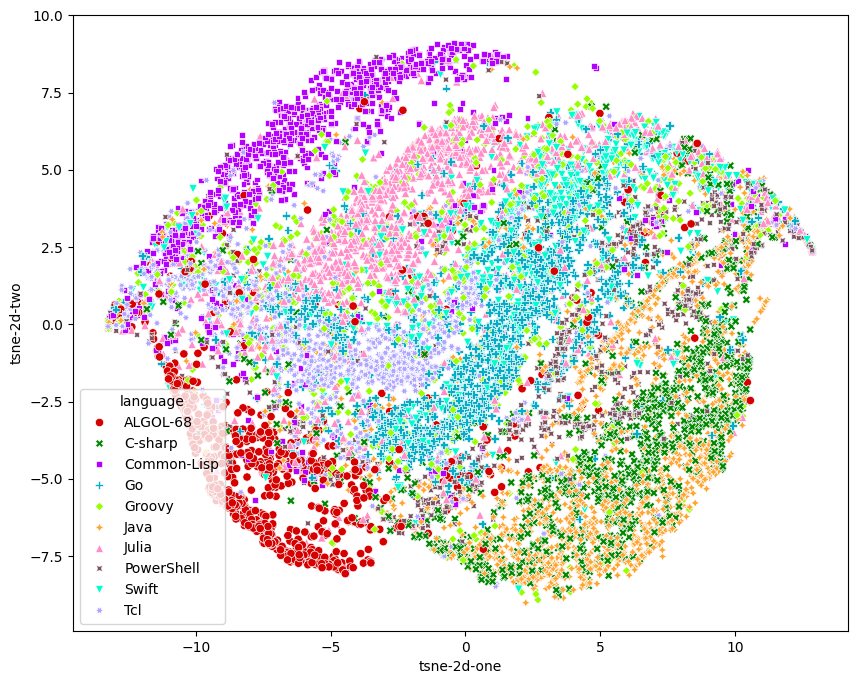

In [13]:
visualize(tsne_df, part_df, model = 'gpt', data_type = 'language')

## RoBERTa

In [3]:
roberta_path = extract_embedding(part_df, device, model='roberta')
roberta_emb = torch.load(roberta_path, map_location="cpu")

out/roberta_12060.pt
Model vertified: RoBERTa


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting extract embeddings......
Time elapsed: 4518.79 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([12060, 768])


In [4]:
tsne_df = tsne(roberta_emb, part_df)

torch.Size([12060, 768]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.003s...
[t-SNE] Computed neighbors for 12060 samples in 2.875s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilities for sample 3000 / 12060
[t-SNE] Computed conditional probabilities for sample 4000 / 12060
[t-SNE] Computed conditional probabilities for sample 5000 / 12060
[t-SNE] Computed conditional probabilities for sample 6000 / 12060
[t-SNE] Computed conditional probabilities for sample 7000 / 12060
[t-SNE] Computed conditional probabilities for sample 8000 / 12060
[t-SNE] Computed conditional probabilities for sample 9000 / 12060
[t-SNE] Computed conditional probabilities for sample 10000 / 12060
[t-SNE] Computed conditional probabilities for sample 11000 / 12060
[t-SNE] Computed conditional probabilities for sample 12000 / 12060
[t-SNE] Computed

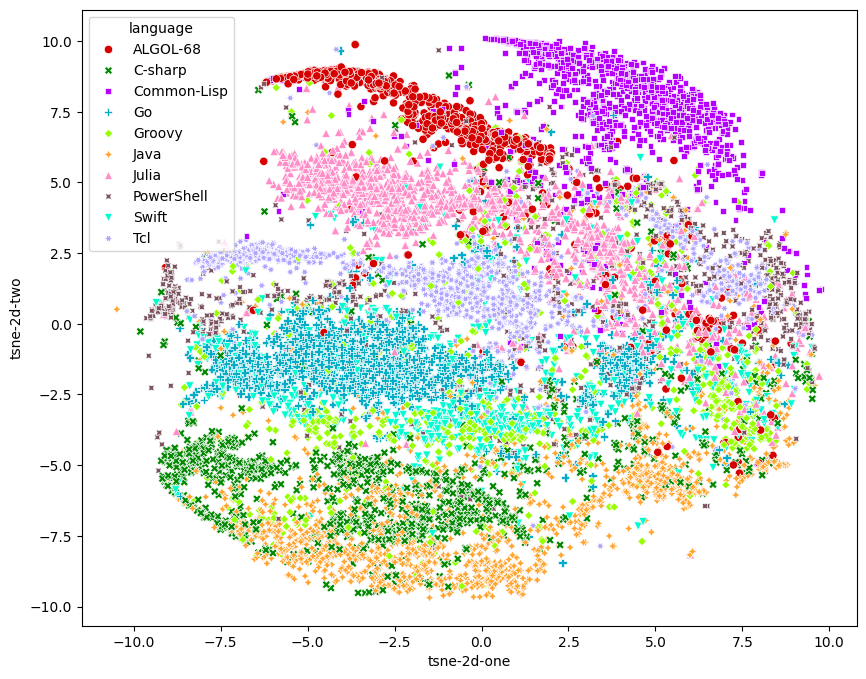

In [5]:
visualize(tsne_df, part_df, model = 'roberta', data_type = 'language')

## CodeBERT

In [6]:
codebert_path = extract_embedding(part_df, device, model='codebert')
codebert_emb = torch.load(codebert_path, map_location="cpu")

out/codebert_12060.pt
Model vertified: CodeBERT


/mnt/j/simin/codeLang/ss_lang/lib/python3.8/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


Starting extract embeddings......
Time elapsed: 4495.66 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([12060, 768])


In [7]:
tsne_df = tsne(codebert_emb, part_df)

torch.Size([12060, 768]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.002s...
[t-SNE] Computed neighbors for 12060 samples in 1.842s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilities for sample 3000 / 12060
[t-SNE] Computed conditional probabilities for sample 4000 / 12060
[t-SNE] Computed conditional probabilities for sample 5000 / 12060
[t-SNE] Computed conditional probabilities for sample 6000 / 12060
[t-SNE] Computed conditional probabilities for sample 7000 / 12060
[t-SNE] Computed conditional probabilities for sample 8000 / 12060
[t-SNE] Computed conditional probabilities for sample 9000 / 12060
[t-SNE] Computed conditional probabilities for sample 10000 / 12060
[t-SNE] Computed conditional probabilities for sample 11000 / 12060
[t-SNE] Computed conditional probabilities for sample 12000 / 12060
[t-SNE] Computed

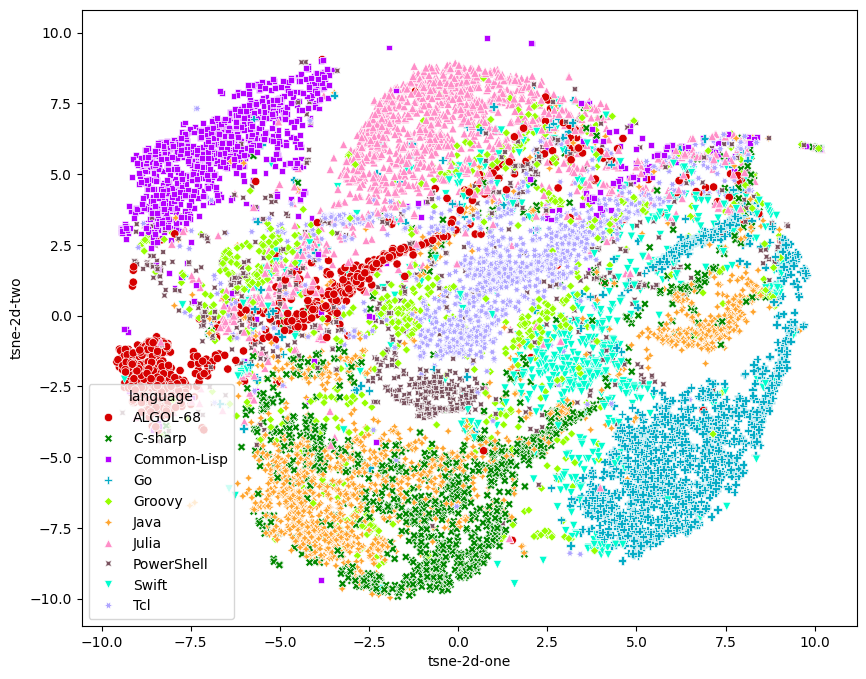

In [8]:
visualize(tsne_df, part_df, model = 'codebert', data_type = 'language')

## CodeGPT

In [9]:
codegpt_path = extract_embedding(part_df, device, model='codegpt')
codegpt_emb = torch.load(codegpt_path, map_location="cpu")

out/codegpt_12060.pt
Model vertified: CodeGPT


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Starting extract embeddings......
Time elapsed: 4803.07 seconds, Data processed:10000
End of extracting...Number of record: torch.Size([12060, 768])


In [10]:
tsne_df = tsne(codegpt_emb, part_df)

torch.Size([12060, 768]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.003s...
[t-SNE] Computed neighbors for 12060 samples in 1.859s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilities for sample 3000 / 12060
[t-SNE] Computed conditional probabilities for sample 4000 / 12060
[t-SNE] Computed conditional probabilities for sample 5000 / 12060
[t-SNE] Computed conditional probabilities for sample 6000 / 12060
[t-SNE] Computed conditional probabilities for sample 7000 / 12060
[t-SNE] Computed conditional probabilities for sample 8000 / 12060
[t-SNE] Computed conditional probabilities for sample 9000 / 12060
[t-SNE] Computed conditional probabilities for sample 10000 / 12060
[t-SNE] Computed conditional probabilities for sample 11000 / 12060
[t-SNE] Computed conditional probabilities for sample 12000 / 12060
[t-SNE] Computed

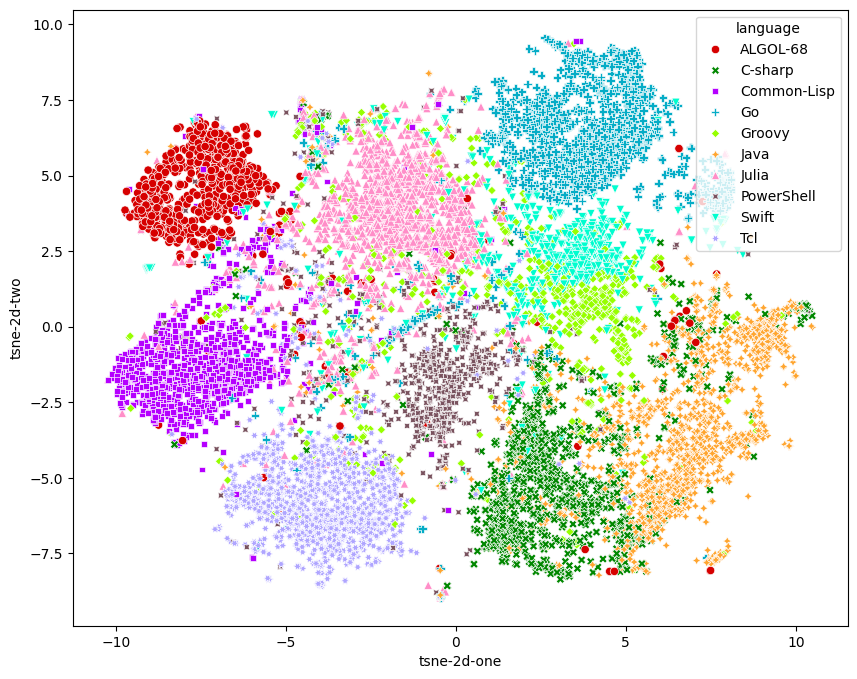

In [11]:
visualize(tsne_df, part_df, model = 'codegpt', data_type = 'language')

## Falcon

In [15]:
falcon_emb = torch.load('out/falcon7b_12060.pt', map_location="cpu")
tsne_df = tsne(falcon_emb, part_df)

torch.Size([12060, 4544]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.018s...
[t-SNE] Computed neighbors for 12060 samples in 11.579s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilities for sample 3000 / 12060
[t-SNE] Computed conditional probabilities for sample 4000 / 12060
[t-SNE] Computed conditional probabilities for sample 5000 / 12060
[t-SNE] Computed conditional probabilities for sample 6000 / 12060
[t-SNE] Computed conditional probabilities for sample 7000 / 12060
[t-SNE] Computed conditional probabilities for sample 8000 / 12060
[t-SNE] Computed conditional probabilities for sample 9000 / 12060
[t-SNE] Computed conditional probabilities for sample 10000 / 12060
[t-SNE] Computed conditional probabilities for sample 11000 / 12060
[t-SNE] Computed conditional probabilities for sample 12000 / 12060
[t-SNE] Comput

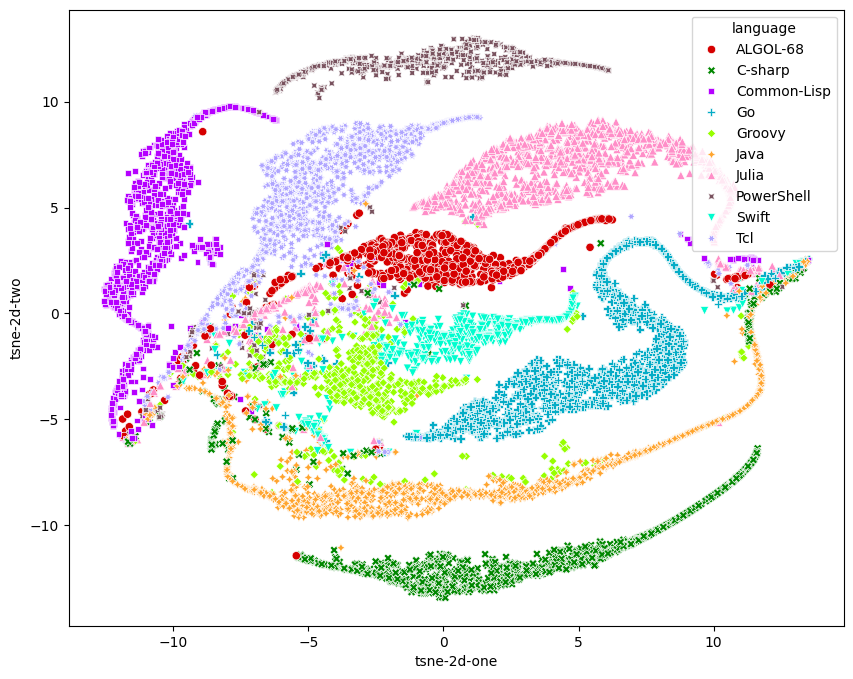

In [16]:
visualize(tsne_df, part_df, model = 'falcon7b', data_type = 'language')

## Llama

In [18]:
llama_emb = torch.load('out/llama7b_12060.pt', map_location="cpu")
tsne_df = tsne(llama_emb, part_df)

torch.Size([12060, 4096]) 10 1224
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 12060 samples in 0.016s...
[t-SNE] Computed neighbors for 12060 samples in 10.478s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12060
[t-SNE] Computed conditional probabilities for sample 2000 / 12060
[t-SNE] Computed conditional probabilities for sample 3000 / 12060
[t-SNE] Computed conditional probabilities for sample 4000 / 12060
[t-SNE] Computed conditional probabilities for sample 5000 / 12060
[t-SNE] Computed conditional probabilities for sample 6000 / 12060
[t-SNE] Computed conditional probabilities for sample 7000 / 12060
[t-SNE] Computed conditional probabilities for sample 8000 / 12060
[t-SNE] Computed conditional probabilities for sample 9000 / 12060
[t-SNE] Computed conditional probabilities for sample 10000 / 12060
[t-SNE] Computed conditional probabilities for sample 11000 / 12060
[t-SNE] Computed conditional probabilities for sample 12000 / 12060
[t-SNE] Comput

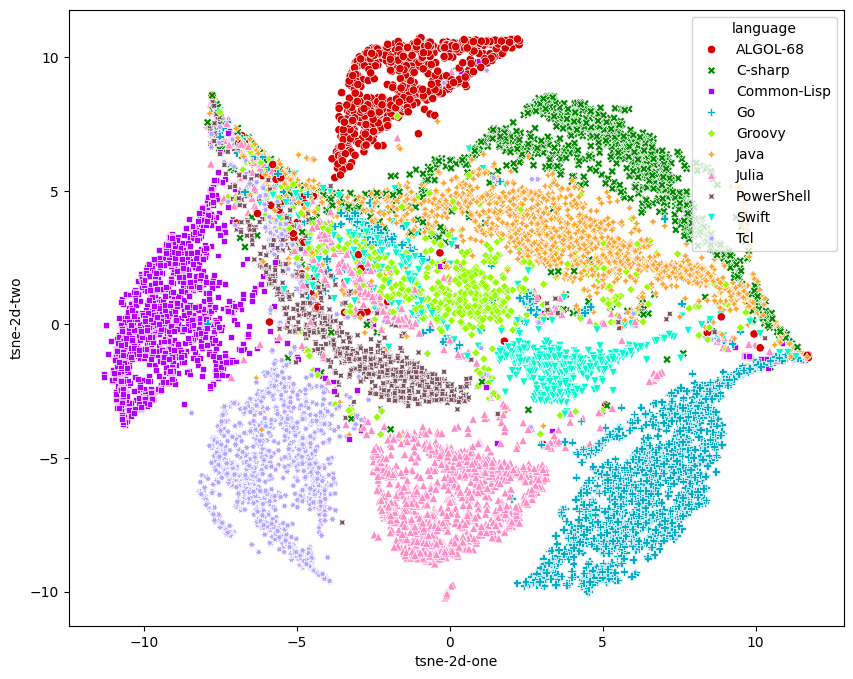

In [19]:
visualize(tsne_df, part_df, model = 'llama', data_type = 'language')